In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 결측치 시각화를 위한 라이브러리
import missingno

In [2]:
# 병합한 채널정보 파일을 불러온다.
df1 = pd.read_csv('open/train/2018_train_채널정보_segment병합.csv')
df1

,기준년월,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,인입일수_ARS_R6M,인입월수_ARS_R6M,인입후경과월_ARS,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,...,당사PAY_방문월수_R6M,당사멤버쉽_방문횟수_B0M,당사멤버쉽_방문횟수_R6M,당사멤버쉽_방문월수_R6M,OS구분코드,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,Segment
0,201807,TRAIN_000000,10회 이상,10회 이상,8,6,0,2,6,2,...,0,22,221,6,Android,0,0,0,0,D
1,201807,TRAIN_000001,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E
2,201807,TRAIN_000002,1회 이상,1회 이상,1,1,0,2,5,1,...,0,0,0,0,Android,11,6,5,5,C
3,201807,TRAIN_000003,10회 이상,10회 이상,10,6,0,2,6,2,...,0,23,219,6,Android,0,0,0,0,D
4,201807,TRAIN_000004,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,Android,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E
2399996,201812,TRAIN_399996,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,1,NaN,0,0,0,0,D
2399997,201812,TRAIN_399997,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,C
2399998,201812,TRAIN_399998,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E


In [4]:
# Segment 비율 계산
segment_ratio = df1['Segment'].value_counts(normalize=True).sort_index() * 100

# 보기 좋게 반올림
segment_ratio = segment_ratio.round(2)

# 결과 출력
print("Segment별 비율 (%):")
print(segment_ratio)

Segment별 비율 (%):
Segment
A     0.04
B     0.01
C     5.32
D    14.55
E    80.09
Name: proportion, dtype: float64


## 인입 -  불만, 불만 후 경과월

In [12]:
# "인입"으로 시작하는 컬럼 추출
inip_columns = [col for col in df1.columns if col.startswith("인입")]

# 컬럼 목록 출력
print("총", len(inip_columns), "개 컬럼:")
for col in inip_columns:
    print(col)

총 19 개 컬럼:
인입횟수_ARS_R6M
인입일수_ARS_R6M
인입월수_ARS_R6M
인입후경과월_ARS
인입횟수_ARS_B0M
인입일수_ARS_B0M
인입횟수_IB_R6M
인입횟수_금융_IB_R6M
인입일수_IB_R6M
인입월수_IB_R6M
인입후경과월_IB_R6M
인입횟수_IB_B0M
인입일수_IB_B0M
인입불만횟수_IB_R6M
인입불만일수_IB_R6M
인입불만월수_IB_R6M
인입불만후경과월_IB_R6M
인입불만횟수_IB_B0M
인입불만일수_IB_B0M


In [7]:
# 분석 대상 컬럼 목록
inip_complain_columns = [
    "인입불만월수_IB_R6M",
    "인입불만일수_IB_B0M",
    "인입불만일수_IB_R6M",
    "인입불만횟수_IB_B0M",
    "인입불만횟수_IB_R6M",
    "인입불만후경과월_IB_R6M"
]

# 다 수치형이다. 위 값에 오류없음
df1[inip_complain_columns].info()

# Segment A~E 대상 필터링
df1_ab = df1[df1['Segment'].isin(['A', 'B', 'C', 'D', 'E'])]

# 세그먼트별 평균값 계산 (보기 편하게 전치)
ab_inip_complain_mean = df1_ab.groupby("Segment")[inip_complain_columns].mean().T

# 결과 출력
display(ab_inip_complain_mean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 6 columns):
 #   Column           Dtype
---  ------           -----
 0   인입불만월수_IB_R6M    int64
 1   인입불만일수_IB_B0M    int64
 2   인입불만일수_IB_R6M    int64
 3   인입불만횟수_IB_B0M    int64
 4   인입불만횟수_IB_R6M    int64
 5   인입불만후경과월_IB_R6M  int64
dtypes: int64(6)
memory usage: 109.9 MB


Segment,A,B,C,D,E
인입불만월수_IB_R6M,0.0,0.0,0.0,0.0,0.0
인입불만일수_IB_B0M,0.0,0.0,0.0,0.0,0.0
인입불만일수_IB_R6M,0.0,0.0,0.0,0.0,0.0
인입불만횟수_IB_B0M,0.0,0.0,0.0,0.0,0.0
인입불만횟수_IB_R6M,0.0,0.0,0.0,0.0,0.0
인입불만후경과월_IB_R6M,6.0,6.0,6.0,6.0,6.0


- 별 의미없음

## 인입 - 월수, 일수, 횟수, 인입후 경과월

In [48]:
# 분석 대상 컬럼 리스트
inip_columns = [
    "인입월수_ARS_R6M", "인입월수_IB_R6M",
    "인입일수_ARS_B0M", "인입일수_ARS_R6M",
    "인입일수_IB_B0M", "인입일수_IB_R6M",
    "인입횟수_ARS_B0M",
    "인입횟수_IB_B0M", "인입횟수_IB_R6M",
    "인입횟수_금융_IB_R6M",
    "인입후경과월_ARS", "인입후경과월_IB_R6M"
]

# 다 수치형이다. 위 값에 오류없음
df1[inip_columns].info()

# Segment A~E만 필터링
df1_ab = df1[df1["Segment"].isin(["A", "B", "C", "D", "E"])]

# 세그먼트별 평균 계산
inip_mean_by_segment = df1_ab.groupby("Segment")[inip_columns].mean().T

# 조건에 따라 컬럼 분리
b0m_cols = [col for col in inip_columns if col.endswith("B0M")]
r6m_cols = [col for col in inip_columns if col.endswith("R6M")]
after_cols = [col for col in inip_columns if col == "인입후경과월_ARS"]

# 각각 필터링된 평균 테이블 생성
inip_mean_b0m = inip_mean_by_segment.loc[b0m_cols]
inip_mean_r6m = inip_mean_by_segment.loc[r6m_cols]
inip_mean_after = inip_mean_by_segment.loc[after_cols]

# 결과 출력
from IPython.display import display

print("▶ B0M 컬럼 평균")
display(inip_mean_b0m)

print("▶ R6M 컬럼 평균")
display(inip_mean_r6m)

print("▶ 인입후경과월_ARS")
display(inip_mean_after)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 12 columns):
 #   Column          Dtype
---  ------          -----
 0   인입월수_ARS_R6M    int64
 1   인입월수_IB_R6M     int64
 2   인입일수_ARS_B0M    int64
 3   인입일수_ARS_R6M    int64
 4   인입일수_IB_B0M     int64
 5   인입일수_IB_R6M     int64
 6   인입횟수_ARS_B0M    int64
 7   인입횟수_IB_B0M     int64
 8   인입횟수_IB_R6M     int64
 9   인입횟수_금융_IB_R6M  int64
 10  인입후경과월_ARS      int64
 11  인입후경과월_IB_R6M   int64
dtypes: int64(12)
memory usage: 219.7 MB
▶ B0M 컬럼 평균


Segment,A,B,C,D,E
인입일수_ARS_B0M,0.237654,0.437500,0.239533,0.187884,0.080206
인입일수_IB_B0M,0.074074,0.159722,0.067787,0.057854,0.031485
인입횟수_ARS_B0M,0.291152,0.569444,0.281738,0.221511,0.100313
인입횟수_IB_B0M,0.182099,0.402778,0.171557,0.145180,0.076646


▶ R6M 컬럼 평균


Segment,A,B,C,D,E
인입월수_ARS_R6M,1.110082,1.652778,1.057520,0.863447,0.457002
인입월수_IB_R6M,0.828189,1.222222,0.723568,0.617440,0.363950
인입일수_ARS_R6M,1.852881,2.652778,1.719884,1.385847,0.718009
인입일수_IB_R6M,1.363169,2.006944,1.125637,0.945236,0.540646
인입횟수_IB_R6M,2.155350,3.298611,1.772357,1.493978,0.846296
인입횟수_금융_IB_R6M,0.000000,0.000000,0.000000,0.000000,0.000000
인입후경과월_IB_R6M,4.291152,3.937500,4.531868,4.721571,5.201684


▶ 인입후경과월_ARS


Segment,A,B,C,D,E
인입후경과월_ARS,1.083333,0.861111,0.971863,0.892195,0.649088


### 개별확인용

In [192]:
df1['인입후경과월_IB_R6M'].value_counts().sort_index()

인입후경과월_IB_R6M
0     112078
1      85916
2      95681
3     106632
4     118487
5     128520
6    1752686
Name: count, dtype: int64

In [194]:
pd.options.display.float_format = '{:.5f}'.format
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["인입후경과월_IB_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

인입후경과월_IB_R6M,0,1,2,3,4,5,6
Segment,,,,,,,
A,91,72,73,72,80,87,497
B,29,7,7,10,10,10,71
C,11152,7240,7757,8411,9063,9820,74147
D,25806,17236,18712,20500,22439,24239,220310
E,75000,61361,69132,77639,86895,94364,1457661


인입후경과월_IB_R6M,0,1,2,3,4,5,6
Segment,,,,,,,
A,0.09362,0.07407,0.07510,0.07407,0.08230,0.08951,0.51132
B,0.20139,0.04861,0.04861,0.06944,0.06944,0.06944,0.49306
C,0.08740,0.05674,0.06080,0.06592,0.07103,0.07697,0.58113
D,0.07389,0.04935,0.05358,0.05870,0.06425,0.06940,0.63082
E,0.03902,0.03192,0.03597,0.04039,0.04521,0.04910,0.75839


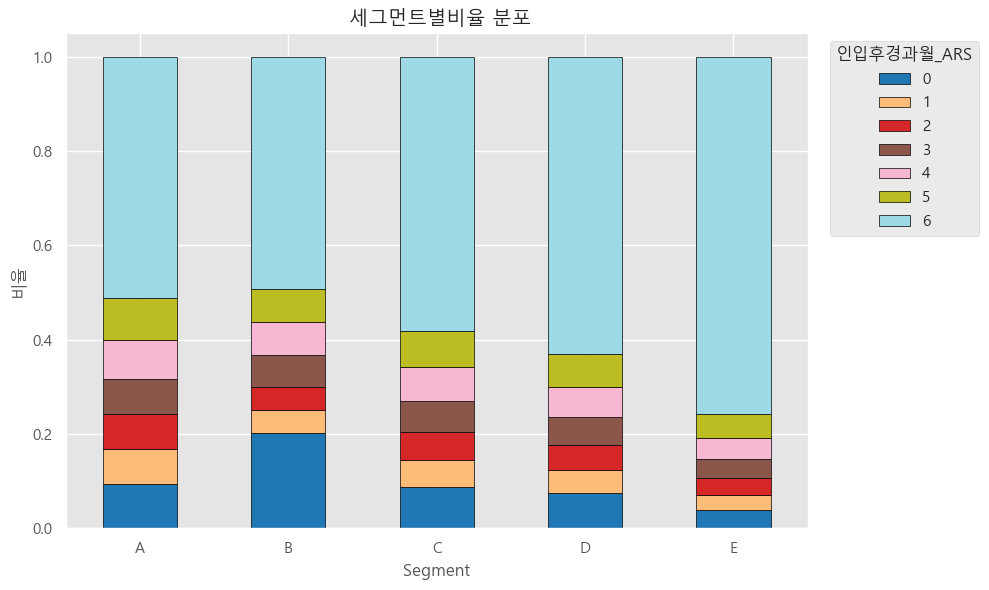

In [202]:
import matplotlib.pyplot as plt

# 스타일 적용 (선택)
plt.style.use("ggplot")

# 데이터 전치 없이 그대로 사용
plot_data = tm_contact_ratio_range.copy()

# 컬럼명을 문자열로 (범례용)
plot_data.columns = plot_data.columns.astype(str)

# 시각화
plot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20',
    edgecolor='black'
)

# 라벨 및 제목
plt.title(" 세그먼트별비율 분포", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("비율", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="인입후경과월_ARS", bbox_to_anchor=(1.02, 1), loc='upper left')  # 오른쪽에 범례
plt.tight_layout()
plt.show()


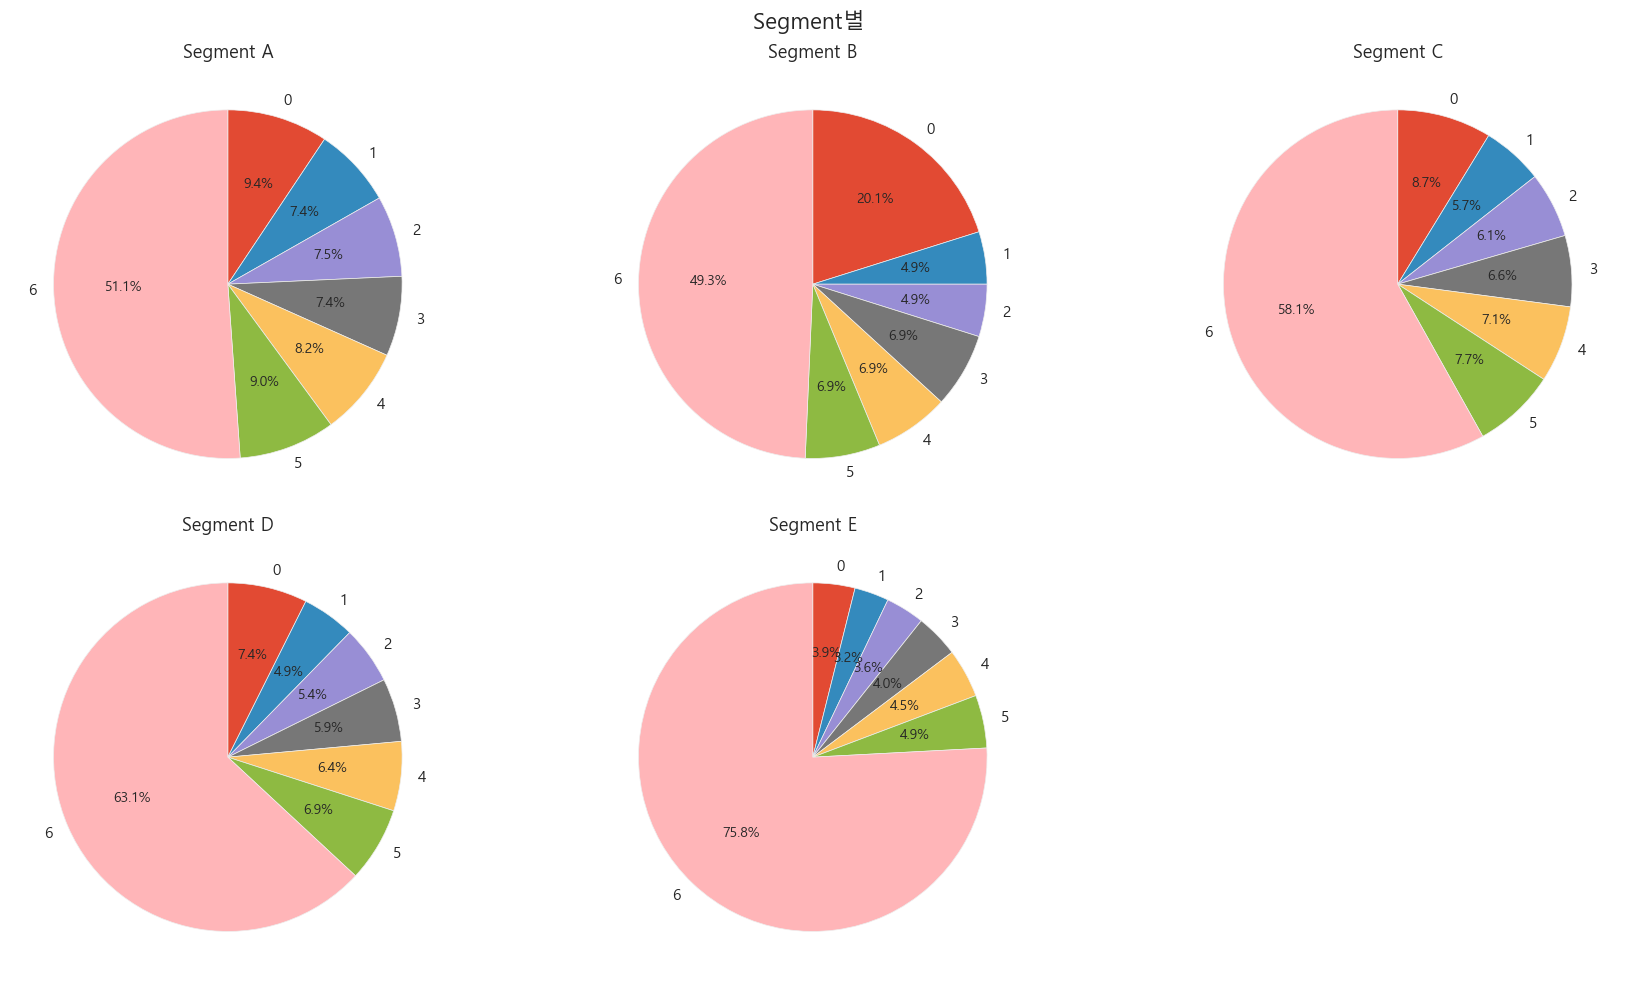

In [198]:
# 0건 제외한 1~16건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 파이차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    data = tm_contact_ratio_range.loc[seg]
    axes[i].pie(
        data,
        labels=data.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg}", fontsize=13)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 ", fontsize=16)
plt.tight_layout()
plt.show()

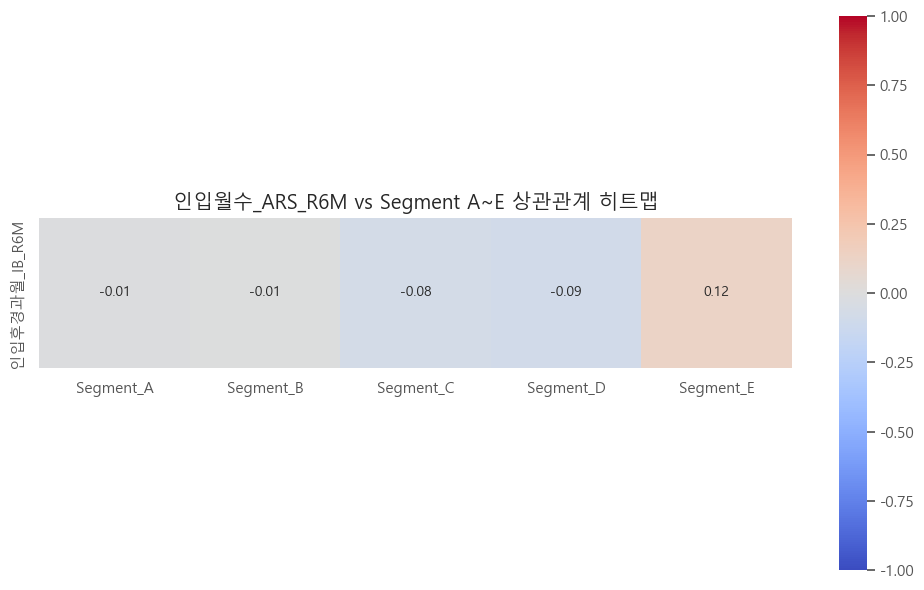

In [200]:
# 컨택건수_채권 관련 수치형 컬럼 리스트
bond_columns = [
    "인입후경과월_IB_R6M"
]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 인코딩된 세그먼트와 홈페이지 컬럼만 추출
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화 (홈페이지 컬럼 vs Segment 컬럼만 표시)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("인입월수_ARS_R6M vs Segment A~E 상관관계 히트맵")
plt.tight_layout()
plt.show()

### 결과해석

### 1. 📊 인입일수_ARS_B0M 세그먼트별 분포 해석

| Segment | 0회 비율 | 1회 비율 | 2회 비율 |
|---------|----------|----------|----------|
| A       | 0.864    | 0.034    | 0.102    |
| B       | 0.771    | 0.021    | 0.208    |
| C       | 0.868    | 0.025    | 0.107    |
| D       | 0.894    | 0.024    | 0.082    |
| E       | 0.951    | 0.018    | 0.031    |

---

#### ✅ 주요 해석

- **E 세그먼트**는 인입일수가 **0회**인 비율이 가장 높음 (**95.1%**) → **ARS 인입 경험이 거의 없음**.
- **B 세그먼트**는 **2회 이상 인입 경험이 가장 높은 그룹** (**20.8%**) → **가장 적극적으로 ARS를 이용한 그룹**.
- **A, C 세그먼트**는 **ARS 인입 비율이 비슷**하며, 약 **10% 수준의 2회 이상 인입 경험**을 가짐.
- **D 세그먼트**는 **중간 수준의 ARS 인입 활동**을 보이며, 대부분 0회지만 일부 1~2회 분포도 존재.

---

#### 🧠 인사이트 요약

- **E 세그먼트는 비활동군**, ARS 인입 경험이 거의 없음.
- **B 세그먼트는 반복 인입 경험이 가장 많은 그룹**으로, ARS 활용도가 가장 높음.
- ARS 인입경험이 많은 세그먼트일수록 고객의 문의/불만, 문제해결
----------

### 2. 📊 인입월수_ARS_R6M 세그먼트별 분포 해석

| Segment | 0개월 | 1개월 | 2개월 | 3개월 | 4개월 | 5개월 | 6개월 |
|---------|--------|--------|--------|--------|--------|--------|--------|
| A       | 0.49486 | 0.22016 | 0.19650 | 0.01132 | 0.00000 | 0.00000 | 0.07716 |
| B       | 0.47917 | 0.22222 | 0.09028 | 0.00000 | 0.00000 | 0.00000 | 0.20833 |
| C       | 0.54474 | 0.21764 | 0.14338 | 0.00368 | 0.00056 | 0.00016 | 0.08984 |
| D       | 0.59966 | 0.20595 | 0.12458 | 0.00315 | 0.00045 | 0.00015 | 0.06605 |
| E       | 0.73725 | 0.16165 | 0.07636 | 0.00176 | 0.00023 | 0.00006 | 0.02269 |

---

#### ✅ 주요 해석

- **E 세그먼트**는 **0개월(즉, ARS 인입 기록 없음)** 비율이 가장 높음 (**73.7%**) → **ARS 미이용자 다수**.
- **B 세그먼트**는 **6개월 인입 기록이 있는 비율**이 가장 높음 (**20.8%**) → **장기적으로 꾸준히 ARS 인입한 고객**.
- **A 세그먼트**는 **1개월 이상 인입한 경험이 고르게 분포**, 특히 **2개월 비율이 19.7%로 높음**.
- **D 세그먼트**는 **3개월 이상 인입 비율이 적지만**, **1~2개월 구간에서의 활동은 존재함**.
- **C 세그먼트**도 **2개월 이상 활동 비율이 14.3%로 높은 편**.

---

#### 🧠 인사이트 요약

- **E 세그먼트는 비활동군**으로, 인입월수 기준으로 거의 ARS 인입 기록이 없음.
- **B 세그먼트는 장기적인 ARS 인입자 비율이 가장 높아**, 상담이나 문의 지속성이 높은 집단일 가능성.
- **A, C 세그먼트는 비교적 ARS 인입 이력이 분산**되어 있어, 중간 수준의 활동군으로 분류 가능.
- **D 세그먼트는 A~C에 비해 인입월수 비율이 짧고 집중도도 낮음**, 비교적 낮은 관심/이용도 보일 수 있음.


### 3. 📊 인입월수_IB_R6M 세그먼트별 분포 해석

| Segment | 0개월 | 1개월 | 2개월 | 3개월 | 4개월 | 5개월 | 6개월 |
|---------|--------|--------|--------|--------|--------|--------|--------|
| A       | 0.47016 | 0.28807 | 0.20576 | 0.01543 | 0.02058 | 0.00000 | 0.00000 |
| B       | 0.47222 | 0.22917 | 0.09028 | 0.04861 | 0.13889 | 0.01389 | 0.00694 |
| C       | 0.56192 | 0.24530 | 0.14170 | 0.02090 | 0.02418 | 0.00049 | 0.00549 |
| D       | 0.61516 | 0.22390 | 0.12026 | 0.01741 | 0.01928 | 0.00032 | 0.00368 |
| E       | 0.74608 | 0.16742 | 0.07169 | 0.00779 | 0.00614 | 0.00007 | 0.00081 |

---

#### ✅ 주요 해석

- **E 세그먼트**는 **0개월 인입 비율이 가장 높음 (74.6%)** → IB채널 인입 경험이 거의 없음.
- **A 세그먼트**는 **1~2개월 인입 비율이 높음 (28.8%, 20.6%)**, **중간 활동군**으로 해석 가능.
- **B 세그먼트**는 비교적 고르게 분포되어 있으나 **4개월 이상에서 활동 비율이 가장 높음 (13.9%)** → **장기 인입자** 비중이 다소 있음.
- **C, D 세그먼트**는 **1~2개월 구간에 집중되며**, 일부 3~4개월 이상 구간도 존재 → **단기-중기 인입 활동자 혼합군**.
- **0개월 비율 기준으로 보면, E > D > C > B ≒ A** 순으로 **비활성 사용자가 많음**.

---

#### 🧠 인사이트 요약

- **E 세그먼트는 IB채널 미사용자 중심**이며, 전반적으로 비활성 고객이 많은 그룹.
- **A, B 세그먼트는 상대적으로 인입 월 수가 분산된 활동 그룹**, 특히 A는 1~2개월 집중.
- **B는 다소 고관여 고객의 패턴(4~6개월 구간 포함)이 나타나며**, 마케팅 타깃으로 적합할 수 있음.
- **D는 비교적 중간 분포 형태를 보이며**, 일부 장기 활동자도 포함.



### 4. 📊 인입횟수_IB_R6M 세그먼트별 분포 해석

| Segment | 0회 | 1~3회 | 4~6회 | 7~9회 | 10회 이상 |
|---------|------|--------|--------|--------|------------|
| A       | 0.47222 | 0.29219 | 0.13169 | 0.07132 | 0.03258 |
| B       | 0.47222 | 0.17161 | 0.08220 | 0.00694 | 0.26703 |
| C       | 0.55906 | 0.25716 | 0.09699 | 0.04892 | 0.03786 |
| D       | 0.61231 | 0.23444 | 0.08405 | 0.03318 | 0.03599 |
| E       | 0.74432 | 0.17647 | 0.05287 | 0.01720 | 0.00914 |

---

#### ✅ 주요 해석 요약

- **E 세그먼트**는 **IB 채널 인입이 거의 없음** (0회 비율 74.4%) → **비활성/비이용 고객 중심**.
- **A 세그먼트**는 **1~3회 구간이 높음 (29.2%)**, 활동의 초기 단계에 있는 고객이 많은 것으로 보임.
- **B 세그먼트**는 **10회 이상 비율이 가장 높음 (26.7%)**, 전반적으로 **고관여 고객군**.
- **C, D 세그먼트**는 1~6회 사이의 **중간 인입 빈도**가 집중됨 → **중간 활성 고객**.
- 전체적으로 **세그먼트가 E로 갈수록 인입 빈도가 낮아짐**.

---

#### 🧠 인사이트

- **고객 관리 관점에서 B 세그먼트는 상담 유입이 많은 핵심 고객군**으로 간주 가능.
- **A, C, D 세그먼트는 유지 및 전환 타깃으로 적절**하며, 특히 **A는 초기 인입 패턴**이 강함.
- **E 세그먼트는 비활성군**으로 간주되며, **이탈 방지 혹은 신규 유입 유도** 전략이 필요함.



### 5. 📊 인입후경과월_ARS 세그먼트별 해석

| Segment | 0개월 | 1개월 | 2개월 | 3개월 | 4개월 | 5개월 |
|---------|--------|--------|--------|--------|--------|--------|
| A       | 0.65432 | 0.06070 | 0.06379 | 0.06790 | 0.07510 | 0.07819 |
| B       | 0.75000 | 0.02778 | 0.03472 | 0.05556 | 0.06250 | 0.06944 |
| C       | 0.69604 | 0.04825 | 0.05533 | 0.06126 | 0.06644 | 0.07269 |
| D       | 0.72223 | 0.04357 | 0.04977 | 0.05572 | 0.06162 | 0.06708 |
| E       | 0.80040 | 0.02966 | 0.03497 | 0.04003 | 0.04531 | 0.04963 |

---

### ✅ 재해석 (인입 후 몇 개월이 지났는지에 대한 시점 기준)

- **0개월 비율이 높을수록 최근 인입이 많다**는 뜻입니다.
- **E 세그먼트는 최근(0개월 내) 인입이 매우 높은 집단 (80.0%)** → **현재 고객 응대나 관심이 집중된 그룹**으로 볼 수 있음.
- **A ~ D 세그먼트는 0개월 비율이 상대적으로 낮고, 1~5개월로 분산**되어 있음 -> **과거 인입 이력이 많은 그룹**일 수 있음.
- 특히 **A 세그먼트는 0개월 비중이 가장 낮고, 1~5개월에 걸쳐 완만하게 분포됨** -> **이전 인입고객이 남아 있는 상태**, 혹은 **이탈 지연 가능성**이 있는 그룹으로 해석 가능함.

---

### 🧠 전략적 인사이트

- **E 세그먼트**: 현재 고객센터 또는 ARS 채널과 **가장 활발히 접촉 중인 고객층** → *즉시 대응 및 실시간 대응 품질이 중요*.
- **A 세그먼트**: 과거 인입 후 **시간이 경과된 고객이 많음** → *후속 케어, 재활성화 마케팅 필요*.
- **B~D 세그먼트**: 최근 인입도 있지만, 일정 비율로 누적된 이력이 존재 → *균형 잡힌 응대 및 고객 만족 관리가 중요*.

---


## 🔍 Segment E 고객 특성 분석 (인입 데이터 기반)

### 📌 주요 특징 요약

| 구분                  | 관찰된 특징                                           |
|-----------------------|--------------------------------------------------------|
| ✅ ARS 인입률          | 낮음 (BOM, R6M 모두 인입 건수 비중이 낮음)             |
| ✅ IB 인입률           | 낮음 (월별 인입 횟수도 전반적으로 낮음)                |
| ✅ 인입후경과월(ARS)   | 0개월 비율 매우 높음 (0.80040) → **최근 인입 많음**      |

---

### 🧠 종합 해석

#### 1. **평소에는 거의 인입을 하지 않는 조용한 고객**
- ARS, IB에서의 인입량이 모두 낮아, 전반적으로 **자체 해결 경향이 강한 고객** 또는 **관심도가 낮은 고객**일 수 있음.
- 보통 **고객센터나 서비스 채널에 접근하지 않고 이용**하는 특성이 있음.

#### 2. **최근 특정 이슈나 이벤트로 인해 '단기간 인입' 증가**
- 인입후경과월 데이터에 따르면, 최근(0개월 이내) 인입 비율이 매우 높음.
- 이는 다음과 같은 패턴으로 볼 수 있음:
  - 📍 **최근 발생한 이슈(요금, 서비스 장애, 알림 등)**에 의해 평소 인입하지 않던 고객도 문의했을 가능성
  - 📍 **대규모 안내/캠페인에 반응**한 일시적 인입 가능성
  - 📍 또는 **계정 문제, 보안, 약관 변경 등 시스템적 트리거**로 인입했을 수 있음

---

### 💡 전략적 시사점

#### ✅ 1. **'조용한 다수'를 움직이게 한 트리거 파악 필요**
- 최근 인입 고객 로그 or 문의 내용을 분석해 **무엇이 Segment E를 움직였는지** 확인하는 것이 중요
- ex) 특정 혜택 종료, 알림톡 발송, 정책변경

#### ✅ 2. **고객의 평소 무반응 특성을 고려한 사전적 대응 전략**
- E 그룹은 평소 인입이 적어 **문제 발생 시 이미 이탈 임계점에 가까운 경우**가 많음
- 조용히 불만을 갖고 떠날 수 있는 고객이므로 **사전 알림, FAQ 강화, 앱 내 팝업 등**으로 미리 안내하는 방식이 유효

#### ✅ 3. **단기 대응 강화**
- 최근 인입이 급증한 만큼, 이 시점에서의 응대 품질은 **고객 재이탈 방지에 핵심**
- 고객센터 응대 품질, FAQ 개선, 재접근 유도 콘텐츠 등이 중요

---

### 🧾 결론

> **Segment E는 평소에는 거의 접촉이 없지만, 최근 특정 사안으로 인해 인입이 집중된 민감한 고객층**입니다.  
> **위험 신호에 가까운 행동 패턴을 보이고 있으므로, 이탈 징후인지 일시적 이슈인지 판단하고 적극적 대응이 필요**합니다.


## 6. 🧾 인입후경과월_IB_R6M 분석 결과 요약

이 지표는 **IB 채널을 통해 인입한 후, 몇 개월이 지났는지를 비율로 나타낸 값**입니다.  
숫자가 클수록 **최근보다 과거에 인입한 고객 비중이 높음**을 의미합니다.

---

### 📊 세그먼트별 특징 정리

| Segment | 0개월 비중 | 6개월 비중 | 특징 요약 |
|---------|------------|------------|-----------|
| **A**   | 0.09362     | 0.51132     | 전반적으로 **최근과 과거 인입이 고르게 분포**, 다소 오래된 인입 고객 비중이 높음 |
| **B**   | 0.20139     | 0.49306     | 최근 인입 고객 비중이 높음 (**0개월 비율 가장 높음**) |
| **C**   | 0.08740     | 0.58113     | 전반적으로 인입이 **중간~과거 시점에 집중**, 최근 인입 비중 낮음 |
| **D**   | 0.07389     | 0.63082     | **과거 인입 고객 비중이 매우 높음**, 장기 보유/방치 가능성 |
| **E**   | 0.03902     | 0.75839     | **6개월 전 인입 비율 가장 높음**, 최근엔 거의 인입 없음 (**장기 유휴 사용자**) |

---

### 🧠 종합 해석

#### 🔹 Segment A
- 전 구간에 비교적 고른 분포
- **지속적으로 IB 인입이 존재하는 고객층**
- 고객센터 이용이 주기적인 고객일 수 있음

#### 🔹 Segment B
- **최근 인입 비중이 가장 높은 그룹**
- 뭔가 최근 이슈 또는 이벤트로 인해 인입이 급증한 고객군일 가능성
- 단기 대응 중요

#### 🔹 Segment C
- 3~6개월에 고르게 분포
- 지속적 이용자지만 최근 인입은 줄어든 고객
- **재이탈 위험 중간**

#### 🔹 Segment D
- **과거 인입 비중이 많고, 최근 거의 없음**
- 오래된 경험 이후 **현재는 침묵** 중인 고객
- **이탈 가능성이 높은 유휴 고객** 가능성 있음

#### 🔹 Segment E
- **극단적으로 과거 인입이 집중된 세그먼트**
- 최근 1~2개월 내 인입 거의 없음
- **사실상 이탈 고객군**으로 추정됨

---

### 💡 전략적 제언

| 세그먼트 | 대응 방향 |
|----------|------------|
| A        | 꾸준한 케어 유지, 주기적 콘텐츠 추천 |
| B        | 최근 이슈 파악 및 맞춤 응대 강화 |
| C        | 최근 활동 감소 → 리텐션 유도 필요 |
| D        | 유휴 징후 → **재접근 유도 캠페인** 필요 |
| E        | **이탈 가능성 큼**, **재활성화 캠페인** 또는 제외 대상 고려 |

---

> **결론:**  
Segment E는 **IB/ARS 모두 인입 적고, 인입도 오래됨** → **재참여 유도 전략** 필요.  
Segment B는 **최근 활성화 지표가 뚜렷**하므로, 이탈 방지를 위한 **즉시 대응/혜택 제공**이 중요함.


## 혼자 범주형: 인입횟수_ARS_R6M

In [9]:
suspect_columns = [
    "인입횟수_ARS_R6M",
    
]

# 각 컬럼별 고유값 출력
for col in suspect_columns:
    print(f"\n[ {col} ]")
    print(df1[col].value_counts(dropna=False))


[ 인입횟수_ARS_R6M ]
인입횟수_ARS_R6M
1회 이상     2328933
10회 이상      71067
Name: count, dtype: int64


In [13]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["인입횟수_ARS_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)
# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)

# 원하는 열 순서로 재정렬 -----------값 범위 컬럼에 따라 다르니 확인
ordered_columns = ["1회 이상", "10회 이상"]
# ordered_columns = ["1회 이상", "10회 이상", "20회 이상", "30회 이상", "40회 이상"]
# ordered_columns = ["1회 이상", "10회 이상", "20회 이상", "30회 이상", "40회 이상", "50회 이상", "60회 이상", "70회 이상", "80회 이상"]
# 순서 변경 적용
tm_contact_dist_ordered = tm_contact_dist.reindex(columns=ordered_columns)
tm_contact_ratio_ordered = tm_contact_ratio.reindex(columns=ordered_columns)

# 출력
display(tm_contact_dist_ordered)
display(tm_contact_ratio_ordered)

인입횟수_ARS_R6M,1회 이상,10회 이상
Segment,,
A,897,75
B,114,30
C,117045,10545
D,328325,20917
E,1882552,39500


인입횟수_ARS_R6M,1회 이상,10회 이상
Segment,,
A,0.922840,0.077160
B,0.791667,0.208333
C,0.917352,0.082648
D,0.940107,0.059893
E,0.979449,0.020551


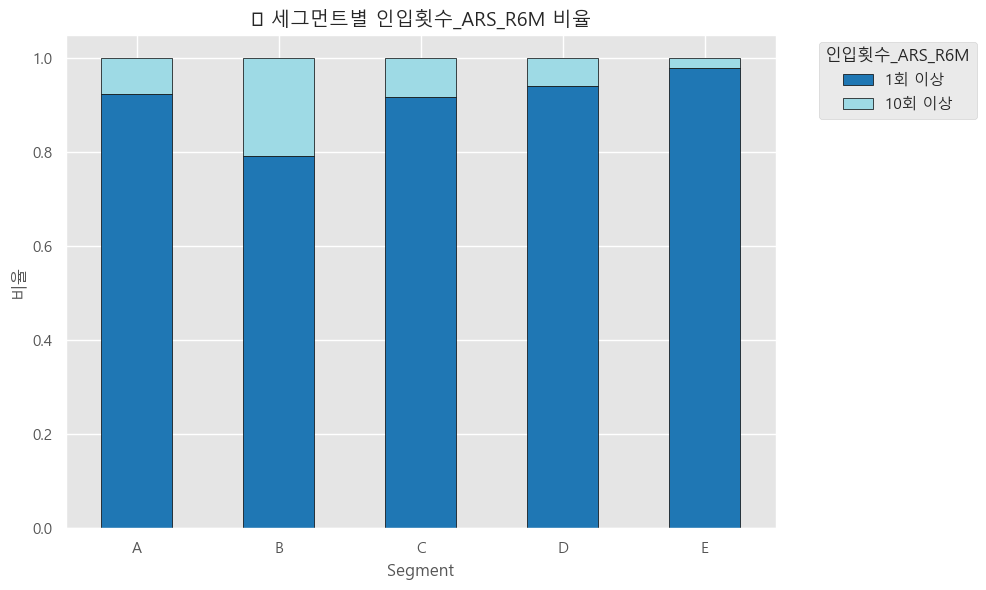

In [17]:
# 막대그래프
import matplotlib.pyplot as plt

# 스타일 설정 (선택)
plt.style.use("ggplot")

# 데이터 (이미 준비된 비율 테이블 사용)
plot_data = tm_contact_ratio_ordered.copy()

# 시각화
plot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20',
    edgecolor='black'
)

# 라벨 및 제목
plt.title("📊 세그먼트별 인입횟수_ARS_R6M 비율", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("비율", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="인입횟수_ARS_R6M", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

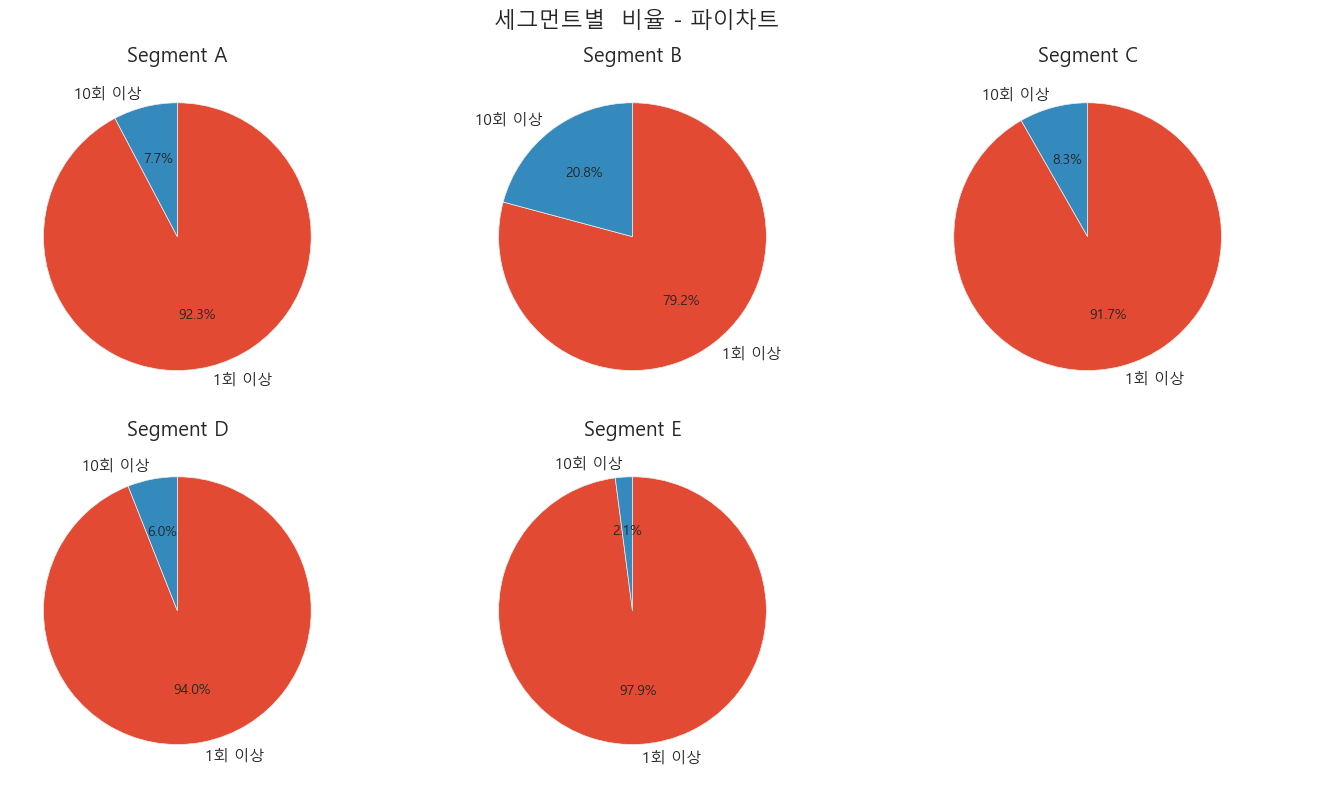

In [19]:
# 파이차트
import matplotlib.pyplot as plt

# 데이터 복사
plot_data = tm_contact_ratio_ordered.copy()

# 세그먼트 리스트
segments = plot_data.index.tolist()

# 서브플롯 설정 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

# 파이차트 반복 생성
for i, seg in enumerate(segments):
    axes[i].pie(
        plot_data.loc[seg],
        labels=plot_data.columns,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg}")

# 마지막 빈 subplot 제거 (5개만 사용)
for j in range(len(segments), len(axes)):
    axes[j].axis('off')

# 전체 타이틀
plt.suptitle(" 세그먼트별  비율 - 파이차트", fontsize=16)
plt.tight_layout()
plt.show()

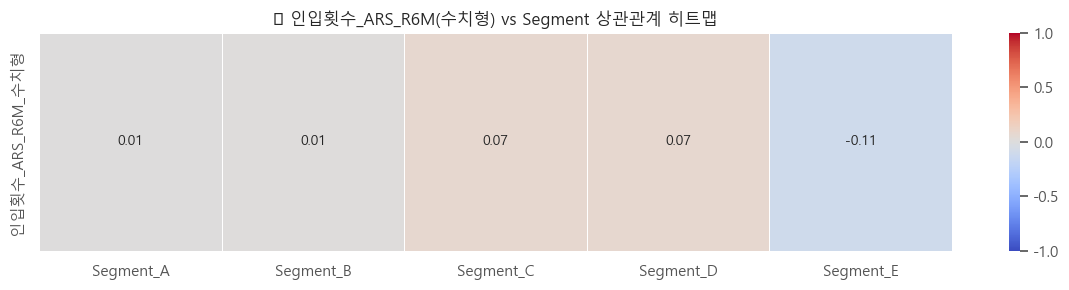

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 매핑 딕셔너리 정의 -----------값 확인하기
mapping = {
    "1회 이상": 1,
    "10회 이상": 10
}

# 2. 매핑 적용 → 새 컬럼 생성 (또는 덮어쓰기)
df1["인입횟수_ARS_R6M_수치형"] = df1["인입횟수_ARS_R6M"].map(mapping)

# 3. 필요한 컬럼만 추출
df_corr = df1[["인입횟수_ARS_R6M_수치형", "Segment"]].dropna()

# 4. Segment 원-핫 인코딩
segment_dummies = pd.get_dummies(df_corr["Segment"], prefix="Segment")

# 5. 병합
df_corr_final = pd.concat([df_corr[["인입횟수_ARS_R6M_수치형"]], segment_dummies], axis=1)

# 6. 상관관계 계산
corr_matrix = df_corr_final.corr()

# 7. 히트맵 시각화
plt.figure(figsize=(12, 3))  # 🔹 크기 줄임
sns.heatmap(
    corr_matrix.loc[["인입횟수_ARS_R6M_수치형"], segment_dummies.columns],
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmax=1,     # 🔹 상관계수 최대값
    vmin=-1     # 🔹 상관계수 최소값
)
plt.title("🧭 인입횟수_ARS_R6M(수치형) vs Segment 상관관계 히트맵", fontsize=12)
plt.tight_layout()
plt.show()

## 홈페이지

In [14]:
# "인입"으로 시작하는 컬럼 추출
homepage_columns = [col for col in df1.columns if col.startswith("홈페이지")]

# 컬럼 목록 출력
print("총", len(homepage_columns), "개 컬럼:")
for col in homepage_columns:
    print(col)

총 4 개 컬럼:
홈페이지_금융건수_R6M
홈페이지_선결제건수_R6M
홈페이지_금융건수_R3M
홈페이지_선결제건수_R3M


In [55]:
# 분석 대상 컬럼 목록
homepage_columns = [
    "홈페이지_금융건수_R6M",
    "홈페이지_선결제건수_R6M",
    "홈페이지_금융건수_R3M",
    "홈페이지_선결제건수_R3M"
]

# 다 수치형이다. 위 값에 오류없음
df1[homepage_columns].info()

# Segment A~E 대상 필터링 (이미 df1_ab가 존재하면 이 부분은 생략 가능)
df1_ab = df1[df1['Segment'].isin(['A', 'B', 'C', 'D', 'E'])]

# 세그먼트별 평균값 계산 (보기 편하게 전치)
ab_homepage_mean = df1_ab.groupby("Segment")[homepage_columns].mean().T

# 결과 출력
display(ab_homepage_mean)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 4 columns):
 #   Column          Dtype
---  ------          -----
 0   홈페이지_금융건수_R6M   int64
 1   홈페이지_선결제건수_R6M  int64
 2   홈페이지_금융건수_R3M   int64
 3   홈페이지_선결제건수_R3M  int64
dtypes: int64(4)
memory usage: 73.2 MB


Segment,A,B,C,D,E
홈페이지_금융건수_R6M,1.926955,4.770833,1.731876,1.341608,0.560850
홈페이지_선결제건수_R6M,2.051440,7.048611,2.202586,1.847662,0.735678
홈페이지_금융건수_R3M,1.034979,2.437500,0.927095,0.734264,0.312194
홈페이지_선결제건수_R3M,1.128601,3.625000,1.178462,0.992166,0.397980


### 개별확인용

In [258]:
df1['홈페이지_선결제건수_R6M'].value_counts().sort_index()

홈페이지_선결제건수_R6M
0     2103789
1         865
2        8022
3       30510
4       41775
5       31006
6       31857
7       30271
8       28942
9       17584
10      13733
11       9547
12       7577
13       6049
14       5251
15       4915
16       4321
17       3975
18       3518
19       3075
20       2756
21       2439
22       2154
23       1877
24       1651
25       1153
26        768
27        412
28        157
29         42
30          9
Name: count, dtype: int64

In [260]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["홈페이지_선결제건수_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

홈페이지_선결제건수_R6M,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Segment,,,,,,,,,,,,,,,,,,,,,
A,734,1,4,19,32,20,19,23,26,17,...,1,5,1,0,0,0,0,0,0,0
B,79,0,0,0,5,2,6,2,6,1,...,3,6,7,4,4,3,1,1,0,0
C,96438,64,644,2340,3720,2985,2881,2880,3099,2074,...,376,353,319,301,209,174,99,41,11,3
D,274373,190,1888,6702,9012,7133,7624,7245,6966,4677,...,890,752,604,523,373,235,139,48,7,1
E,1732165,610,5486,21449,29006,20866,21327,20121,18845,10815,...,1169,1038,946,823,567,356,173,67,24,5


홈페이지_선결제건수_R6M,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Segment,,,,,,,,,,,,,,,,,,,,,
A,0.75514,0.00103,0.00412,0.01955,0.03292,0.02058,0.01955,0.02366,0.02675,0.01749,...,0.00103,0.00514,0.00103,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
B,0.54861,0.00000,0.00000,0.00000,0.03472,0.01389,0.04167,0.01389,0.04167,0.00694,...,0.02083,0.04167,0.04861,0.02778,0.02778,0.02083,0.00694,0.00694,0.00000,0.00000
C,0.75584,0.00050,0.00505,0.01834,0.02916,0.02340,0.02258,0.02257,0.02429,0.01626,...,0.00295,0.00277,0.00250,0.00236,0.00164,0.00136,0.00078,0.00032,0.00009,0.00002
D,0.78562,0.00054,0.00541,0.01919,0.02580,0.02042,0.02183,0.02074,0.01995,0.01339,...,0.00255,0.00215,0.00173,0.00150,0.00107,0.00067,0.00040,0.00014,0.00002,0.00000
E,0.90121,0.00032,0.00285,0.01116,0.01509,0.01086,0.01110,0.01047,0.00980,0.00563,...,0.00061,0.00054,0.00049,0.00043,0.00029,0.00019,0.00009,0.00003,0.00001,0.00000


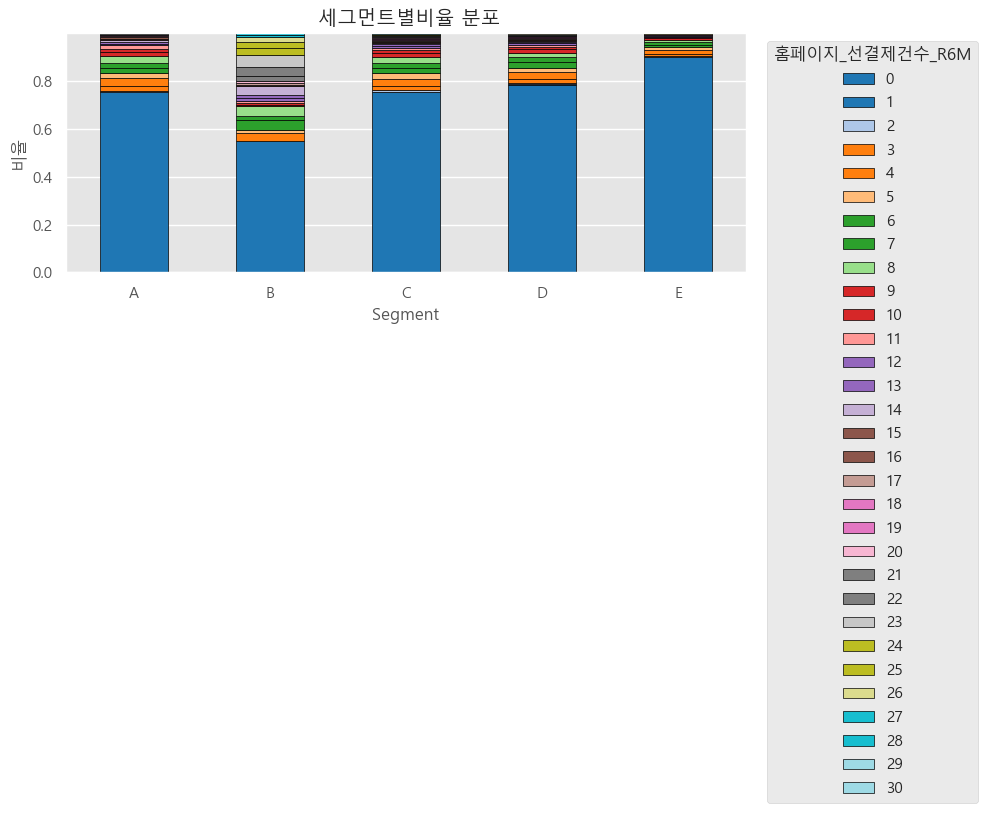

In [268]:
import matplotlib.pyplot as plt

# 스타일 적용 (선택)
plt.style.use("ggplot")

# 데이터 전치 없이 그대로 사용
plot_data = tm_contact_ratio_range.copy()

# 컬럼명을 문자열로 (범례용)
plot_data.columns = plot_data.columns.astype(str)

# 시각화
plot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20',
    edgecolor='black'
)

# 라벨 및 제목
plt.title(" 세그먼트별비율 분포", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("비율", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="홈페이지_선결제건수_R6M", bbox_to_anchor=(1.02, 1), loc='upper left')  # 오른쪽에 범례
plt.tight_layout()
plt.show()

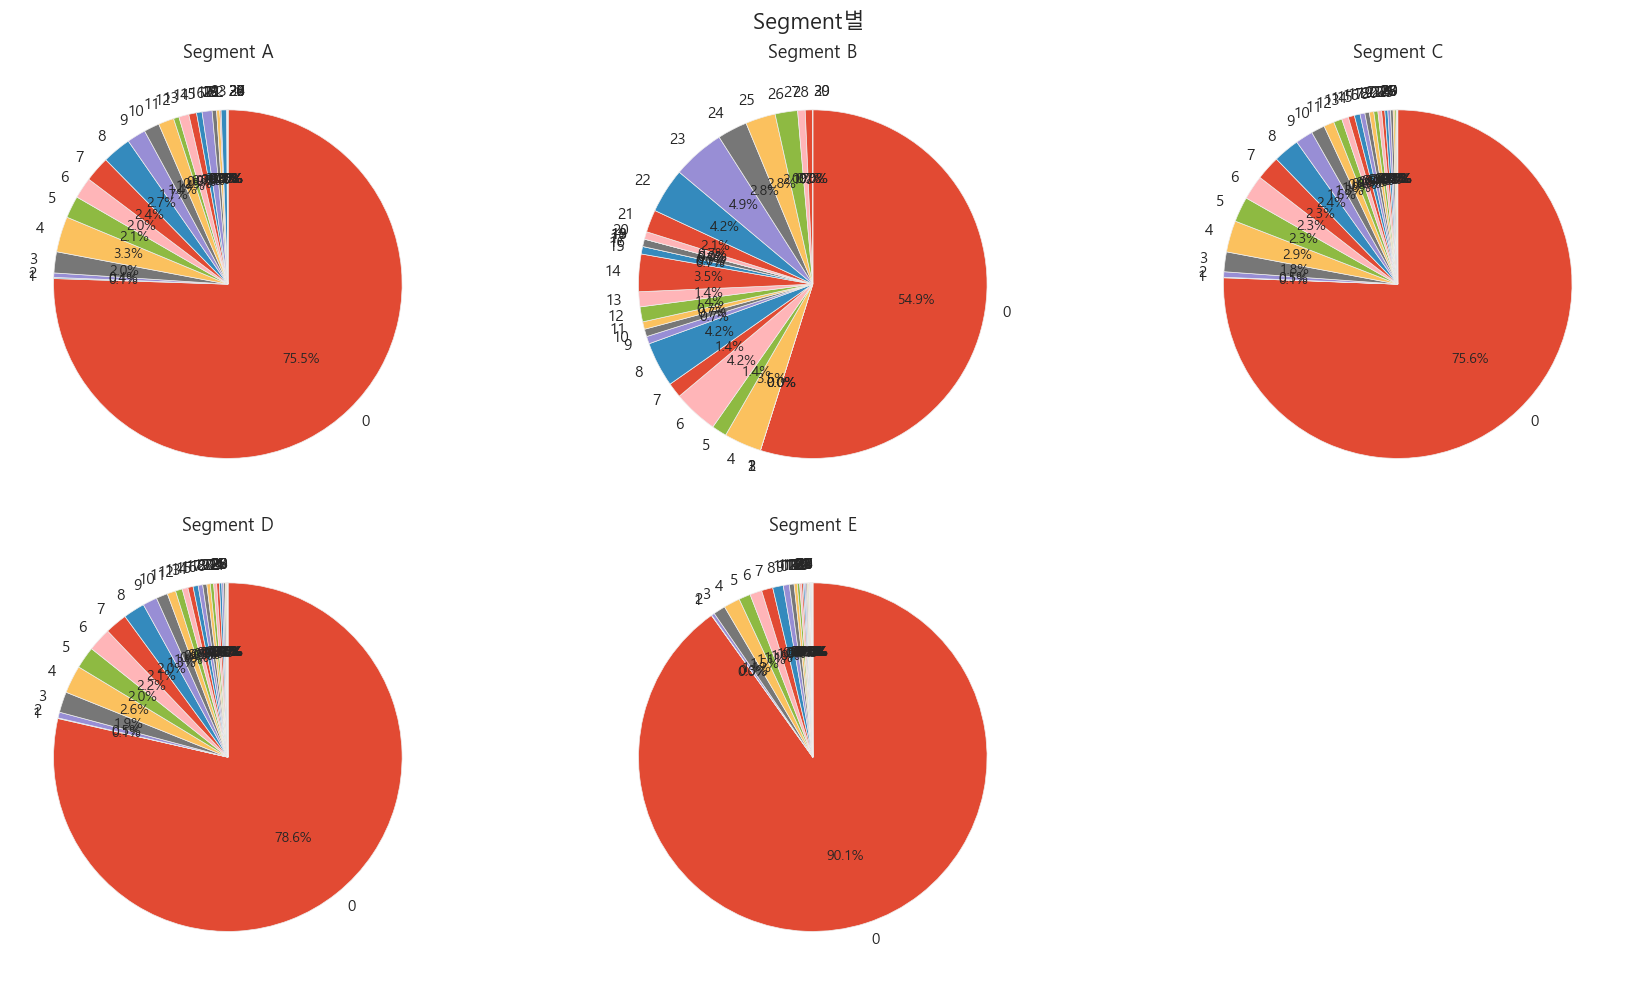

In [264]:
# 0건 제외한 1~16건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 파이차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    data = tm_contact_ratio_range.loc[seg]
    axes[i].pie(
        data,
        labels=data.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg}", fontsize=13)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 ", fontsize=16)
plt.tight_layout()
plt.show()

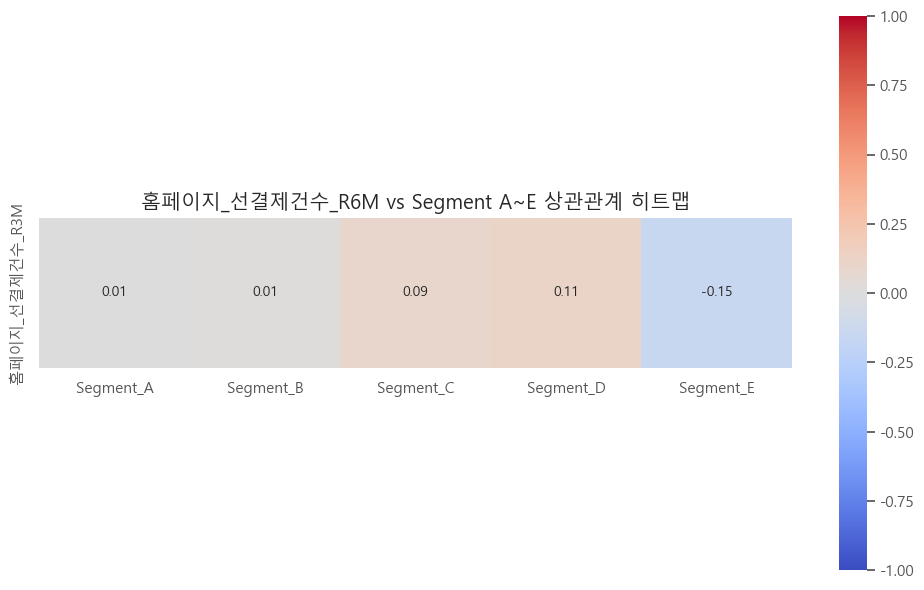

In [266]:
# 컨택건수_채권 관련 수치형 컬럼 리스트
bond_columns = [
    "홈페이지_선결제건수_R3M"
]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 인코딩된 세그먼트와 홈페이지 컬럼만 추출
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화 (홈페이지 컬럼 vs Segment 컬럼만 표시)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("홈페이지_선결제건수_R6M vs Segment A~E 상관관계 히트맵")
plt.tight_layout()
plt.show()

# 결과해석 모음

## 1. 🧾 홈페이지_금융건수_R3M 분석 요약

이 지표는 최근 3개월 동안 홈페이지를 통해 **금융 서비스를 이용한 횟수 분포**를 나타냅니다.  
각 세그먼트별로 0회부터 8회 이상 이용한 비율을 보여주며, **홈페이지 금융 채널 이용의 빈도와 적극성**을 파악할 수 있는 지표입니다.

---

### 📊 세그먼트별 특징 요약

| Segment | 0회 비율 | 다회 이용 (2회 이상) 합계 | 특징 요약 |
|---------|----------|----------------------------|------------|
| **A**   | 76.5%     | 약 23.5%                    | 기본적으로 접근은 있으나 반복 이용은 낮음 |
| **B**   | 47.9%     | 약 52.1%                    | 전체적으로 고른 다회 이용 비율, **활성 고객군** |
| **C**   | 77.6%     | 약 22.4%                    | 대부분 0회 이용, 일부만 반복적 사용 |
| **D**   | 80.6%     | 약 19.4%                    | 접근률 낮고, 반복성 더 낮음 → **비활성에 가까움** |
| **E**   | 91.2%     | 약 8.8%                     | 거의 모든 고객이 **홈페이지 금융 미사용** 상태 |

---

### 🧠 종합 해석

#### 🔹 Segment A
- 비교적 0회 이용자 비중이 높지만, 3~6회 정도의 중간 빈도 고객도 일부 존재
- **중간 정도의 관심층**, 마케팅 푸시 시 반응 가능성 있음

#### 🔹 Segment B
- 0회 비율이 가장 낮고, 3~5회 이상 비율이 고르게 분포
- **홈페이지 금융서비스의 주이용층**, 상품 홍보/추가 서비스 유도 우선 대상

#### 🔹 Segment C
- 대부분 0회 이용이지만, **3~5회 정도의 비율**이 다소 있음
- 소수의 충성 고객 + 다수의 무관심층 구성

#### 🔹 Segment D
- 0회 비율 높고, 전체적으로 낮은 이용률
- **잠재적 이탈층** 또는 웹 금융 기능의 필요성이 낮은 고객군

#### 🔹 Segment E
- 거의 전원 0회 이용
- **완전 미이용층**, 타 채널 선호 or 홈페이지 금융 접근성 낮은 집단

---

### 💡 전략적 제언

| Segment | 제안 전략 |
|---------|------------|
| A       | 금융 상품 소개 및 **사용 유도 콘텐츠 노출** 필요 |
| B       | **프리미엄 서비스**, 이벤트 참여, 개인화 마케팅 타겟 |
| C       | 충성도 높은 소수 식별 후 리텐션 전략, **대부분 제외** 가능 |
| D       | 전환 캠페인 or **채널 편의성 개선** 시도 |
| E       | **사용 유도보다는 제외/다른 채널 유도** 전략 적합 |

---

> **요약:**  
Segment B는 홈페이지 기반 금융 거래에 매우 활발하며, 적극적 리텐션 및 유료서비스 안내에 적합한 타깃군입니다.  
반면, Segment E는 거의 홈페이지 기반 금융 기능을 사용하지 않는 비활성 고객으로, 타 채널 기반 대응 또는 제외 전략이 필요합니다.


## 2. 🧾 홈페이지_금융건수_R6M 분석 요약

이 지표는 최근 6개월 동안 고객이 **홈페이지를 통해 금융 서비스를 얼마나 자주 이용했는지**를 보여주는 지표입니다.  
횟수는 0~15회까지 있으며, 숫자가 높을수록 더 자주 이용한 고객을 의미합니다.

---

### 📊 세그먼트별 주요 특성 요약

| Segment | 0회 비율 | 5회 이상 비율 (누적) | 주요 특징 요약 |
|---------|----------|------------------------|----------------|
| **A**   | 75.1%     | 약 22.6%               | 기본적으로 미사용 비율 높음, 일부 고빈도 |
| **B**   | 40.3%     | **45.6%**               | 전 구간에 고른 분포, **가장 활성화된 고객군** |
| **C**   | 75.4%     | 약 20.8%               | A와 유사하나, 고빈도 사용자가 더 낮음 |
| **D**   | 78.4%     | 약 16.9%               | 미사용층 많고, 반복 이용자 소수 |
| **E**   | 89.9%     | **9.9%**                | 가장 낮은 반복 이용자 비율 → **비활성 고객층**

---

### 🔍 세그먼트별 상세 해석

#### 🔹 Segment A
- 75% 이상이 홈페이지 금융 서비스를 전혀 이용하지 않음.
- 하지만 10회 이상 반복 이용자도 일부 존재 → **소수의 충성 사용자 존재**
- **정제된 타겟 마케팅** 필요.

#### 🔹 Segment B
- 0회 비율은 전체에서 가장 낮음 (40.3%)
- **3~10회 이상**까지의 반복 이용 고객 다수 분포
- **충성 고객 기반 + 반복성 높음**, 홈페이지 주사용자층

#### 🔹 Segment C
- A와 유사한 분포이나 반복 이용자는 상대적으로 더 적음
- **한두 번 사용한 경험층**이 일부 존재

#### 🔹 Segment D
- 80%에 가까운 고객이 0회 또는 1회만 사용
- **홈페이지 기반 채널과 거리가 먼 집단**
- 대체 채널 유입이 높거나 관심도 낮음

#### 🔹 Segment E
- 거의 90%가 홈페이지 금융기능을 **전혀 사용하지 않음**
- 사실상 **비활성 또는 오프라인 선호형** 고객으로 해석 가능

---

### 💡 전략 제안

| Segment | 전략 |
|---------|------|
| A       | 충성 사용자 추출 → 개인화 캠페인 / 미사용자 대상 유입 유도 |
| B       | 홈페이지 전용 혜택 / 이벤트 / 프리미엄 금융 서비스 타겟 |
| C       | 이용 경험을 확장할 수 있는 퀵 메뉴, 사용 가이드 제공 |
| D       | 다른 채널로의 전환 유도 / UI 접근성 개선 여부 검토 |
| E       | 유입 유도보다는 **대체 채널 강화** 또는 분리 관리 고려 |

---

> ✅ **요약:**  
Segment B는 가장 활발하게 홈페이지 금융 서비스를 이용하고 있으며, 핵심 타겟층이다.  
Segment E는 홈페이지 금융 사용과 관련성이 낮은 비활성층으로 판단되며, 마케팅 효율을 고려할 때 직접적 유입보다는 다른 전략이 요구된다.


## 3. 💳 홈페이지_선결제건수_R3M 세그먼트별 분석

이 지표는 고객이 최근 3개월간 **홈페이지를 통해 선결제(즉, 청구금액을 사전 납부)** 한 횟수 분포를 나타냅니다.  
값이 클수록 선결제 활동이 많으며, 고객의 **재무적 여유/적극성**을 유추할 수 있는 지표입니다.

---

### 📊 세그먼트별 주요 수치 요약 (0회 비율 기준)

| Segment | 0회 비율 | 1회 이상 비율 (누적) | 고빈도 이용자 특성 |
|---------|----------|-----------------------|------------------|
| A       | 78.5%     | 약 21.5%               | 중간정도 이용군 |
| B       | 58.3%     | **41.7%**               | **가장 활발한 고객층** |
| C       | 78.5%     | 21.5%                 | A와 유사 |
| D       | 81.2%     | 18.8%                 | 비활성층 다수 |
| E       | 91.6%     | **8.4%**                | **가장 비활성 고객층** |

---

### 🔍 세그먼트별 특징 해석

#### 🔹 Segment A
- 전체 고객의 약 **78.5%가 0회**로, 선결제 이용 비율은 낮음.
- 그러나 **10% 이상**은 4회 이상 선결제 기록 보유.
- **선결제 경험층이 일부 존재**하는 균형적 세그먼트.

#### 🔹 Segment B
- 0회 비율이 가장 낮고, **1~4회 이상 반복 이용 비율**이 두드러짐.
- **적극적인 자금 운용 특성** → 금리 민감도 높을 수 있음.
- **주 타겟 고객층**으로 활용 가능.

#### 🔹 Segment C
- A와 유사하나, **3회 이상 비율이 더 낮음** → 경험층이 더 적은 편.

#### 🔹 Segment D
- 전체의 80% 이상이 선결제를 하지 않음.
- 일부 3~4회 사용자 분포가 있으나 소수 → **잠재 고객군**

#### 🔹 Segment E
- 0회 비율이 **91.6%**로 가장 높음.
- **선결제 채널 사용이 거의 없는 비활성층**으로, 자산 여력 부족 또는 정보 부족 가능성.

---

### 💡 전략 제안

| Segment | 마케팅 제안 |
|---------|-------------|
| A       | 이용자에게 리마인드 알림 / 선결제 혜택 강화 |
| B       | 타겟 마케팅 / 금리 우대 및 포인트 적립 제공 |
| C       | 인식 제고 캠페인: '선결제의 장점' 강조 |
| D       | 행동 유도형 프로모션 (예: 첫 선결제 시 캐시백) |
| E       | 직접 마케팅 비효율 → **대체 지표 기반 리타겟팅 고려**

---

> ✅ **요약:**  
Segment **B**는 선결제 기능을 가장 활발히 이용하는 핵심 충성층이며,  
Segment **E**는 홈페이지 선결제를 거의 하지 않는 **비활성 고객층**입니다.
